In [37]:
# end of Q2
# Q3

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm

### scipy distribution object: What can we calculate from distribution?
- value -> probability  
   -- pmf: probability at a particular value of random variable (only for discrete distributions!)  
    -- pdf: probability at a particular value of random variable (for continuous distributions)  
   -- cdf: cumulative probablity for less than or equal to value of random variable     
   -- sf:  probability for a random variable **greater than** certain value
- probability -> value  
   -- ppf: less than or equal to a point   
   -- isf: greater than a point  
- rvs for random values 

Q1: A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

What is the probability that no cars drive up in the noon hour?
What is the probability that 3 or more cars come through the drive through?
How likely is it that the drive through gets at least 1 car?

In [ ]:
# lambda = λ
#

In [209]:
car_mean = 2
# λ = 2

In [210]:
car = stats.poisson(2)
car

In [211]:
# What is the probability that no cars drive up in the noon hour?
car.pmf(0)

0.1353352832366127

In [212]:
# What is the probability that 3 or more cars come through the drive through?
'''This function will determine the probabiliy of 3 or more cars coming through 
the drive through within the noon hour'''
car.sf(2)

0.32332358381693654

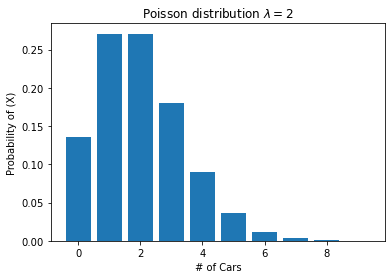

In [213]:
x = np.arange(0,10)
y = car.pmf(x)

plt.bar(x,y)
plt.xlabel('# of Cars')
plt.ylabel('Probability of (X)')
plt.title('Poisson distribution $λ = 2$');

In [215]:
# How likely is it that the drive through gets at least 1 car?
car.sf(0)

0.8646647167633873

Q2: Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:
What grade point average is required to be in the top 5% of the graduating class? What GPA constitutes the bottom 15% of the class? An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship? If I have a GPA of 3.5, what percentile am I in?

In [17]:
su_mean = 3
su_std = 0.3

In [18]:
grades_model = stats.norm(su_mean, su_std)
grades_model

In [24]:
# What GPA constitutes the bottom 15% of the class? 
'''Demonstrating what would constitute the bottom 15% of the class and what GPA they would be at or below'''
grades_model.ppf(0.15)

2.689069983151863

In [27]:
grades_model.cdf([0.2 , 0.3])

array([5.12962847e-21, 1.12858841e-19])

In [48]:
grades_model.isf(0.85)

2.689069983151863

In [219]:
'''Deciles are divided into 10, so the third decile would fall in the 20-30% of the GPA distribution'''
'''this function will give the GPA at the bottom 20% and below'''
grades_model.isf(0.8)

2.7475136299281258

In [51]:
'''This will give the GPA at the bottom 30%'''
grades_model.isf(0.7)

2.842679846187588

In [221]:
grades_model.ppf([0.2,0.3])

array([2.74751363, 2.84267985])

In [223]:
'''testing out where exactly thise GPA values fall in the distribution'''
grades_model.cdf([2.7 , 2.8])

array([0.15865525, 0.25249254])

In [54]:
grades_model.isf([0.2 , 0.3, 0.4])

array([3.25248637, 3.15732015, 3.07600413])

In [57]:
p = grades_model.ppf([0.2, 0.3])

array([2.74751363, 2.84267985])

In [72]:
grades_model.pdf([2.5, 2.7])

array([0.33159046, 0.80656908])

In [69]:
grades_model.cdf(2.5)

0.0477903522728147

In [121]:
grades_model.ppf(.3)

2.842679846187588

In [120]:
grades_model.ppf(.2)

2.7475136299281258

In [122]:
grades_model.ppf(.3) - grades_model.ppf(.2)

0.0951662162594622

In [ ]:
#2.7475136299281258 - 2.842679846187588, range(0.0951662162594622)
# a 2.8 GPA would qualify

In [124]:
# If I have a GPA of 3.5, what percentile am I in?
grades_model.sf(3.5)
# top 5%

0.0477903522728147

In [216]:
grades_model.isf(0.05)

3.4934560880854417

In [218]:
grades_model.ppf(0.95)

3.4934560880854417

In [ ]:
x = grades_model
y = pmf(x)

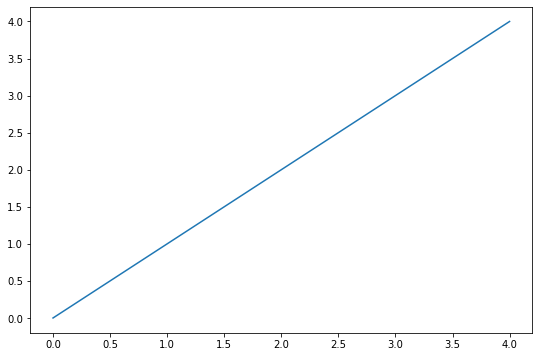

In [231]:
fig, ax = plt.subplots(figsize=(9,6))
x1 = np.arange(0,5)
y1 = x1
ax.plot(x1, y1)

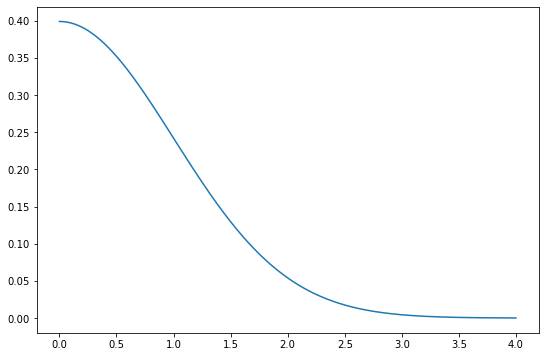

In [240]:
x = np.arange(0, 4, 0.001)
y = norm.pdf(x,0,1)
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x,y)

Q3: A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [28]:
click_rate = 0.02
visitors = 4326

In [233]:
visitors * click_rate
# This is my expected value(click-throughs)

86.52

In [32]:
website = stats.binom(4326, 0.02)
website

In [34]:
website.sf(97)

0.11781530585978471

In [241]:
# originally inputed the incorrect value
website.sf(96)

0.13975823631416448

In [242]:
clicks = np.random.choice([0,1], (10_000, 4326), p=(0.98,0.02))

In [243]:
(clicks.sum(axis=1) >= 97).mean()

0.1421

Q4: You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

What is the probability that at least one of your first 60 answers is correct?

In [ ]:
# trials 1/100

In [244]:
# 
q60 = 60
q100 = 100
# qa is my probability (0.01)
qa = np.arange(0,100)

In [246]:
q_prob = stats.binom(q60, qa).sf(1)
q_prob
q_df = pd.DataFrame(q_prob)
q_df

,0
0,0.0
1,1.0
2,NaN
3,NaN
4,NaN
...,...
95,NaN
96,NaN
97,NaN
98,NaN


In [247]:
stats.binom(q60, qa).sf(0)

array([ 0.,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [250]:
n = 60
p = 0.01

In [251]:
stats.binom(60, 0.01)

In [252]:
stats.binom(60, 0.01).sf(0)

0.45284335760923855

In [109]:
correct = ['y','n']

In [112]:
y_n = np.random.choice(correct, (10_000, 60), p = ((1/10000),(9999/10000)))

In [117]:
(y_n == 'y').sum(axis=1).mean()

0.0042

Q5: The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [77]:
chance = 0.03
present = round(0.9*66)
day1 = 1
day2 = 2
week = 7
present
# trials is the value of present

59

In [81]:
clean_prob = stats.binom(59, 0.03)
clean_prob

In [85]:
clean_prob.cdf(4)

0.9680748482990916

In [253]:
'''Checking work against Madeleine's'''
clean_prob.sf(0)

0.8342199288437352

In [254]:
stats.binom(present*2, chance).pmf(0)

0.027483031992576134

In [87]:
clean = ['yes', 'no']
#die_roll.rvs(10_000)

In [90]:
np.random.choice(clean, (10_000, 59), p = [0.03,0.97])

array([['no', 'no', 'no', ..., 'no', 'no', 'no'],
       ['no', 'no', 'no', ..., 'no', 'no', 'no'],
       ['no', 'no', 'no', ..., 'no', 'no', 'no'],
       ...,
       ['no', 'no', 'no', ..., 'no', 'no', 'no'],
       ['no', 'no', 'no', ..., 'no', 'no', 'no'],
       ['no', 'no', 'no', ..., 'no', 'no', 'no']], dtype='<U3')

In [93]:
clean_df = pd.DataFrame(np.random.choice(clean, (10_000, 59), p = [0.03,0.97]))
clean_df

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,no,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,no,no,yes,no
1,no,yes,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,no
2,no,no,no,no,no,no,no,no,no,no,...,yes,no,no,no,no,no,no,no,no,no
3,no,no,no,no,no,no,yes,no,no,no,...,no,no,no,no,no,no,no,no,no,no
4,no,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,no,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,no
9996,no,yes,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,no
9997,no,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,no
9998,no,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,no


In [125]:
clean_df == 'yes'

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [130]:
(clean_df == 'yes').sum(axis=1)

0       3
1       1
2       1
3       1
4       1
       ..
9995    0
9996    2
9997    2
9998    1
9999    5
Length: 10000, dtype: int64

In [131]:
(clean_df == 'yes').sum(axis=1) >= 1

0        True
1        True
2        True
3        True
4        True
        ...  
9995    False
9996     True
9997     True
9998     True
9999     True
Length: 10000, dtype: bool

In [132]:
((clean_df == 'yes').sum(axis=1) >= 1).mean()

0.8358

Q6: You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [ ]:
# must get food by 1:15 (assuming lunch is 12:30-1:30)
# food must be ordered by 1:35 to get it by 1:45 (getting to the register by 1:33)
# if in La Panaderia at 12:30, no more than 17 people can be in front of you for you to have 15 minutes to eat.

In [257]:
panaderia_m = 15 * 2
panaderia_std = 3 * 2

In [258]:
stats.norm(panaderia_m, panaderia_std).cdf(33)

0.6914624612740131

In [ ]:
xp = np.arange(0, 60, 0.1)
yp = 

In [186]:
time = np.arange(0,60)

def notime(t):
    for t in time:
        if t < 45:
            return 'theres time'
        elif t > 45:
            return 'no time'
        elif t > 60:
            return 'not possible'
    
notime(65)

'theres time'

In [187]:
notime(50)

'theres time'

In [41]:
bread_mean = 15
bread_std = 3

In [133]:
stats.norm(15,3)

In [134]:
stats.norm(15,3).rvs(50)

array([17.08569738, 14.39383605,  9.09488169, 12.22916989, 13.48473415,
       13.42712702, 13.53663041, 12.55597153, 18.71405285, 20.61827083,
       12.61187852, 22.90375241, 20.98947144, 17.4132023 , 14.28961864,
       17.03187924, 14.84099203,  8.65350048,  9.53173709, 15.18544003,
       18.81801136, 14.08082791, 18.60577015, 13.02682461, 19.93118824,
       17.81586284, 11.02802247, 21.6701998 , 18.3104108 , 14.96540597,
       19.54813704, 12.72619336, 10.6492125 , 11.62324131, 14.07839241,
       11.55193078, 16.88508742, 17.51379666, 14.13844354, 13.20104434,
       14.31148799, 17.31116268, 16.29871449, 13.00900046, 14.05071198,
       10.98118448, 15.32050568, 12.97876368, 14.77495913, 20.59312737])

Q7: Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

What percent of employees earn less than 60,000?
What percent of employees earn more than 95,000?
What percent of employees earn between 65,000 and 80,000?
What do the top 5% of employees make?
Hint If you're looking at this exercise and wondering "How do I get pandas to talk the database, again?", remember that you'll need 3 things: your .gitignore, your env.py, and to use pd.read_sql. Copy over your .gitignore and env.py from your data science libraries exercises folder, and connect to the employees database like so:

In [170]:
import env

In [176]:
import os

In [171]:
from env import host,username, password

In [173]:
#mysql+pymysql://codeup:p@assw0rd@data@codeup.com/some_db

In [174]:
url = f'mysql+pymysql://{username}:{password}@{host}/employees'

In [181]:
os.path.exists('env.py')

False

In [185]:
sql = '''
SELECT *
FROM employees
join salaries
using (emp_no)
WHERE to_date > NOW()
LIMIT 100
'''

employees = pd.read_sql(sql, url)
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01


In [199]:
avg_salary = '''
SELECT round(avg(salary), 2)
as 'Average Salary'
FROM salaries
WHERE to_date > NOW()
LIMIT 100
'''

avg_salaries = pd.read_sql(avg_salary, url)
avg_salaries.head()

,Average Salary
0,72012.24


In [200]:
type(avg_salaries)

pandas.core.frame.DataFrame

In [205]:
avg_salaries()

TypeError: 'DataFrame' object is not callable

In [ ]:
# Average salary: 72,012.24

In [193]:
salary_std = '''
SELECT round(std(salary), 2)
FROM salaries
WHERE to_date > NOW()
LIMIT 100
'''

salaries = pd.read_sql(salary_std, url)
salaries.head()

,"round(std(salary), 2)"
0,17309.96


In [194]:
#Salary STD: 17,310